## UFood Data Analyst Case

UFood is the lead food delivery app in Brazil, present in over a thousand cities.

Keeping a high customer engagement is key for growing and consolidating the company's position as the market leader.

Data Analysts working within the data team are constantly challenged to provide insights and value to the company through open scope projects. This case intends to simulate that.

In this case, you are presented a sample dataset, that mocks metainformation on the customer and on UFood campaign interactions with that customer.

It is your challenge to understand the data, find business opportunities & insights and to propose any data-driven action to optimize the campaign results & generate value to the company. You should consider that you have to present your results to both technical and business stakeholders.

---

## Business Context

The customers can order and acquire products through 3 sales channels:
- Physical stores
- Catalogs
- Company's website

Globally, the company had solid revenues and a healthy bottom line in the past 3 years, but the profit growth perspectives for the next 3 years are not promising. For this reason, several strategic initiatives are being considered to invert this situation.

**One is to improve the performance of marketing activities, with a special focus on marketing campaigns.**

### The Marketing Department

The marketing department was pressured to spend its annual budget more wisely. Desirably, the success of these activities will prove the value of the approach and convince the more skeptical within the company.

---

## Meta-data Table

| Feature | Description |
|---------|-------------|
| **AcceptedCmp1** | 1 if customer accepted the offer in the 1st campaign, 0 otherwise |
| **AcceptedCmp2** | 1 if customer accepted the offer in the 2nd campaign, 0 otherwise |
| **AcceptedCmp3** | 1 if customer accepted the offer in the 3rd campaign, 0 otherwise |
| **AcceptedCmp4** | 1 if customer accepted the offer in the 4th campaign, 0 otherwise |
| **AcceptedCmp5** | 1 if customer accepted the offer in the 5th campaign, 0 otherwise |
| **Response (target)** | 1 if customer accepted the offer in the last campaign, 0 otherwise |
| **Complain** | 1 if customer complained in the last 2 years |
| **DtCustomer** | Date of customer's enrollment with the company |
| **Education** | Customer's level of education |
| **Marital** | Customer's marital status |
| **Kidhome** | Number of small children in customer's household |
| **Teenhome** | Number of teenagers in customer's household |
| **Income** | Customer's yearly household income |
| **MntFishProducts** | Amount spent on fish products in the last 2 years |
| **MntMeatProducts** | Amount spent on meat products in the last 2 years |
| **MntFruits** | Amount spent on fruits in the last 2 years |
| **MntSweetProducts** | Amount spent on sweet products in the last 2 years |
| **MntWines** | Amount spent on wines in the last 2 years |
| **MntGoldProds** | Amount spent on gold products in the last 2 years |
| **NumDealsPurchases** | Number of purchases made with discount |
| **NumCatalogPurchases** | Number of purchases made using catalog |
| **NumStorePurchases** | Number of purchases made directly in stores |
| **NumWebPurchases** | Number of purchases made through company's website |
| **NumWebVisitsMonth** | Number of visits to company's website in the last month |
| **Recency** | Number of days since the last purchase |

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
food = pd.read_csv(r'C:\Users\bende\Desktop\Pandas\u_food_marketing.csv')
pd.set_option('display.max.columns', 45)

## Raw data preview

In [4]:
food

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,63,2822,0,0,1,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,66,2272,0,0,1,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,55,2471,0,0,0,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,36,2298,0,0,0,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,39,2320,0,1,0,0,0,0,0,0,0,1,407,392,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,61223.0,0,1,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0,53,2540,0,1,0,0,0,0,0,1,0,0,1094,847,0
2201,64014.0,2,1,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0,74,2178,0,0,0,1,0,0,0,0,0,1,436,428,1
2202,56981.0,0,0,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0,39,2314,1,0,0,0,0,0,0,1,0,0,1217,1193,1
2203,69245.0,0,1,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0,64,2315,0,0,0,1,0,0,0,0,1,0,782,721,0


In [5]:
food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

# Data cleaning

## Deleting duplicates

In [6]:
food.drop_duplicates(inplace=True) 
food.shape[0] 
# 184 duplicates deleted

2021

## Combining kids and teens together

In [7]:
# The aim is to get rid of similar columns and to summarize data about the children in one column
food['Total children'] = food[['Kidhome', 'Teenhome']].sum(axis=1)
food[['Total children']].head()

,Total children
0,0
1,2
2,0
3,1
4,1


## Combining marital status

In [8]:
# In our original dataset we had 5 columns with marital status, which is not suitable for making insights
# for each of these columns where we had values 1 or 0, we replaced 1 to 1,2,3,4,5 for each status
food['marital_Divorced'] = food['marital_Divorced'].replace({1:5,0:0})
food['marital_Married'] = food['marital_Married'].replace({1:4,0:0})
food['marital_Single'] = food['marital_Single'].replace({1:3,0:0})
food['marital_Together'] = food['marital_Together'].replace({1:2,0:0})
food['marital_Widow'] = food['marital_Widow'].replace({1:1,0:0})

In [9]:
# then we make a sum of all these in one separate column with a status for all
food['Marital_Status'] = food[['marital_Divorced', 'marital_Married', 'marital_Single', 'marital_Together', 'marital_Widow']].sum(axis=1)

In [10]:
# Now we are mapping those numeric statuses with string status
food['Marital_Status_str'] = food['Marital_Status'].map({5:'Divorced', 4:'Married', 3:'Single', 2:'Together', 1:'Widow'})
food[['Marital_Status_str']].head()

,Marital_Status_str
0,Single
1,Single
2,Together
3,Together
4,Married


## Combining educational status

In [11]:
# In our original dataset we had 5 columns with educational status, which is not suitable for making insights
# for each of these column where we had values 1 or 0, we replaced 1 to 1,2,3,4,5
food['education_2n Cycle'] = food['education_2n Cycle'].replace({1:1,0:0})
food['education_Basic'] = food['education_Basic'].replace({1:2,0:0})
food['education_Graduation'] = food['education_Graduation'].replace({1:3,0:0})
food['education_Master'] = food['education_Master'].replace({1:4,0:0})
food['education_PhD'] = food['education_PhD'].replace({1:5,0:0})

In [12]:
food['Education_Status'] = food[['education_2n Cycle', 'education_Basic', 'education_Graduation', 'education_Master', 'education_PhD']].sum(axis=1)

In [13]:
# Now we are mapping those numeric statuses with string status
food['Education_Status_str'] = food['Education_Status'].map({1:'2n Cycle', 2:'Basic', 3:'Graduation', 4:'Master', 5:'PhD'})
food[['Education_Status_str']].head()

,Education_Status_str
0,Graduation
1,Graduation
2,Graduation
3,Graduation
4,PhD


## One column for any of accepted campaigns 

In [14]:
# Because there is no obvious difference in accepted campaigns, we combine them together
# (!!! also joining Response - as the latest accepted campaign, so it differs from the given column AcceptedCmpOverall)
food['Accepted_Campaigns'] = food[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']].sum(axis=1)

In [15]:
# converting 'Accepted_Campaigns' to a column where 1 appears for any value not equal to 0 (1,2, ...)
food['Accepted_Campaigns'] = (food['Accepted_Campaigns'] != 0).astype(int)

In [16]:
food[['Accepted_Campaigns']].head()

,Accepted_Campaigns
0,1
1,0
2,0
3,0
4,0


# Analytics

## Finding correlations with accepted campaigns

In [17]:
# Using pearson method of correlation of each feature with those who accepted any of a campaign
corr_accepted = food.corr(numeric_only=True, method='pearson')['Accepted_Campaigns'].sort_values(ascending=False).reset_index()
# Renaming columns in result
corr_accepted.rename(columns={'index': 'Feature', 'Accepted_Campaigns': 'Correlation_accept_camp'}, inplace=True)
# Removing unuseful features like accepted campaigns and response (last accepted)
corr_accepted = corr_accepted[~corr_accepted['Feature'].str.contains('Accepted|Response', regex=True)].dropna()
corr_accepted.head(10)

,Feature,Correlation_accept_camp
7,MntWines,0.418647
8,MntTotal,0.396330
9,MntRegularProds,0.394459
10,NumCatalogPurchases,0.324215
11,MntMeatProducts,0.302546
12,Income,0.295926
13,NumWebPurchases,0.220552
14,MntGoldProds,0.188638
16,MntSweetProducts,0.159904
17,MntFishProducts,0.152153


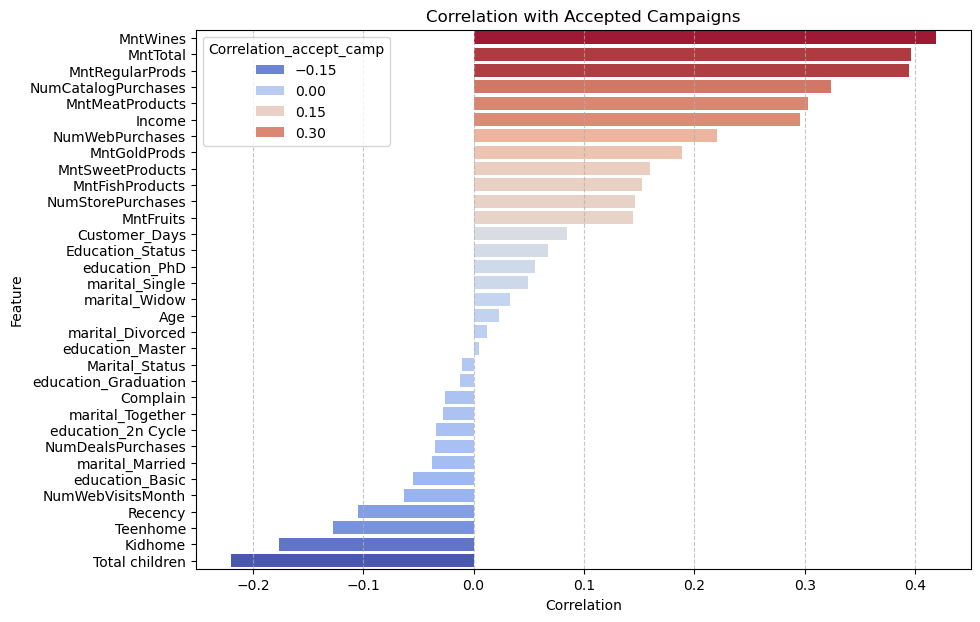

In [18]:
plt.figure(figsize=(10, 7))
sns.barplot(data = corr_accepted, x='Correlation_accept_camp', y='Feature', hue='Correlation_accept_camp', palette="coolwarm")
plt.xlabel("Correlation")
plt.ylabel("Feature")
plt.title("Correlation with Accepted Campaigns")
plt.grid(axis="x", linestyle="--", alpha=0.7)

plt.show()

**We see, that customers accepted the offer are more likely to spend:**
- more on wine or meat products, 
- more regular-priced products, 
- they are customers with higher income who have higher total amount spent on all products, 
- who frequently order via catalog or through the company's website 



## All of the more or less significant correlations

### Correlation matrix where correlations > 0.3

In [19]:
all_correlations = food.corr(numeric_only=True, method='pearson')
all_correlations = all_correlations[(all_correlations > 0.3) & (all_correlations < 1)]
all_correlations

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,Total children,Marital_Status,Education_Status,Accepted_Campaigns
Income,NaN,NaN,NaN,NaN,0.724708,0.535848,0.697477,0.549806,0.552832,0.407378,NaN,0.495144,0.705481,0.684358,NaN,NaN,NaN,0.414748,0.347445,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.819203,0.813709,0.386264,NaN,NaN,NaN,NaN
Kidhome,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.443678,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.681959,NaN,NaN,NaN
Teenhome,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.383452,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.363746,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.696311,NaN,NaN,NaN
Recency,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MntWines,0.724708,NaN,NaN,NaN,NaN,0.382979,0.587013,0.391603,0.382027,0.388793,NaN,0.547999,0.667444,0.635343,NaN,NaN,0.360534,0.465395,0.353909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.900320,0.899770,0.504129,NaN,NaN,NaN,0.418647
MntFruits,0.535848,NaN,NaN,NaN,0.382979,NaN,0.567547,0.590591,0.559035,0.397650,NaN,NaN,0.513863,0.453758,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.605987,0.592953,NaN,NaN,NaN,NaN,NaN
MntMeatProducts,0.697477,NaN,NaN,NaN,0.587013,0.567547,NaN,0.591345,0.550626,0.369275,NaN,0.322937,0.711143,0.511026,NaN,NaN,NaN,0.387075,0.332420,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.859909,0.859577,0.317153,NaN,NaN,NaN,0.302546
MntFishProducts,0.549806,NaN,NaN,NaN,0.391603,0.590591,0.591345,NaN,0.582989,0.423038,NaN,NaN,0.558567,0.460480,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.632563,0.618217,NaN,NaN,NaN,NaN,NaN
MntSweetProducts,0.552832,NaN,NaN,NaN,0.382027,0.559035,0.550626,0.582989,NaN,0.360066,NaN,0.327708,0.519824,0.451245,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.599632,0.589846,NaN,NaN,NaN,NaN,NaN
MntGoldProds,0.407378,NaN,NaN,NaN,0.388793,0.397650,0.369275,0.423038,0.360066,NaN,NaN,0.407874,0.468126,0.382198,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.461980,0.387133,NaN,NaN,NaN,NaN,NaN


### Heatmap of all correlations > 0.3

<Axes: >

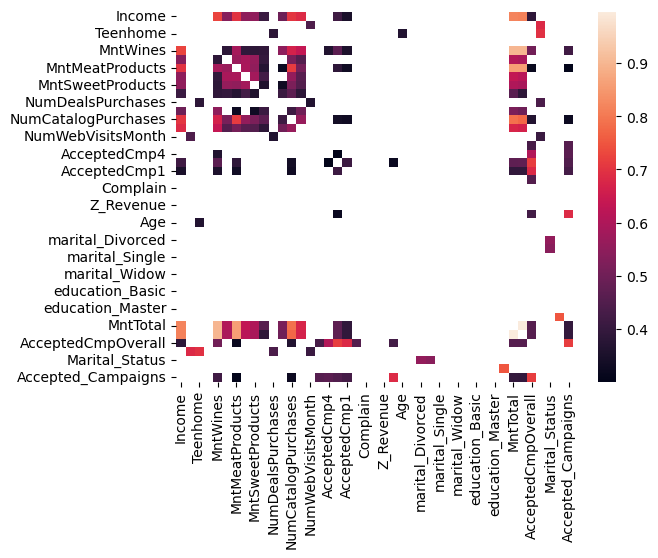

In [20]:
all_correlations = food.corr(numeric_only=True, method='pearson')
all_correlations = all_correlations[(all_correlations > 0.3) & (all_correlations < 1)]
sns.heatmap(all_correlations)

### List of top correlated pairs

In [21]:
all_correlations
correlation_pairs = all_correlations.unstack().reset_index()
correlation_pairs.columns = ['Feature_1', 'Feature_2', 'Correlation']
correlation_pairs = correlation_pairs[correlation_pairs['Feature_1'] != correlation_pairs['Feature_2']].dropna()
# deleting duplicates of pairs ((A, B) and (B, A))
correlation_pairs['Pairs'] = correlation_pairs.apply(lambda x: tuple(sorted([x['Feature_1'], x['Feature_2']])), axis=1)
correlation_pairs = correlation_pairs.drop_duplicates(subset=['Pairs']).drop(columns=['Pairs'])
correlation_pairs = correlation_pairs.sort_values(by='Correlation', ascending = False)
correlation_pairs.head(20)

,Feature_1,Feature_2,Correlation
1585,MntTotal,MntRegularProds,0.996582
208,MntWines,MntTotal,0.900320
209,MntWines,MntRegularProds,0.899770
294,MntMeatProducts,MntTotal,0.859909
295,MntMeatProducts,MntRegularProds,0.859577
36,Income,MntTotal,0.819203
37,Income,MntRegularProds,0.813709
552,NumCatalogPurchases,MntTotal,0.787832
553,NumCatalogPurchases,MntRegularProds,0.775437
1546,education_PhD,Education_Status,0.751743


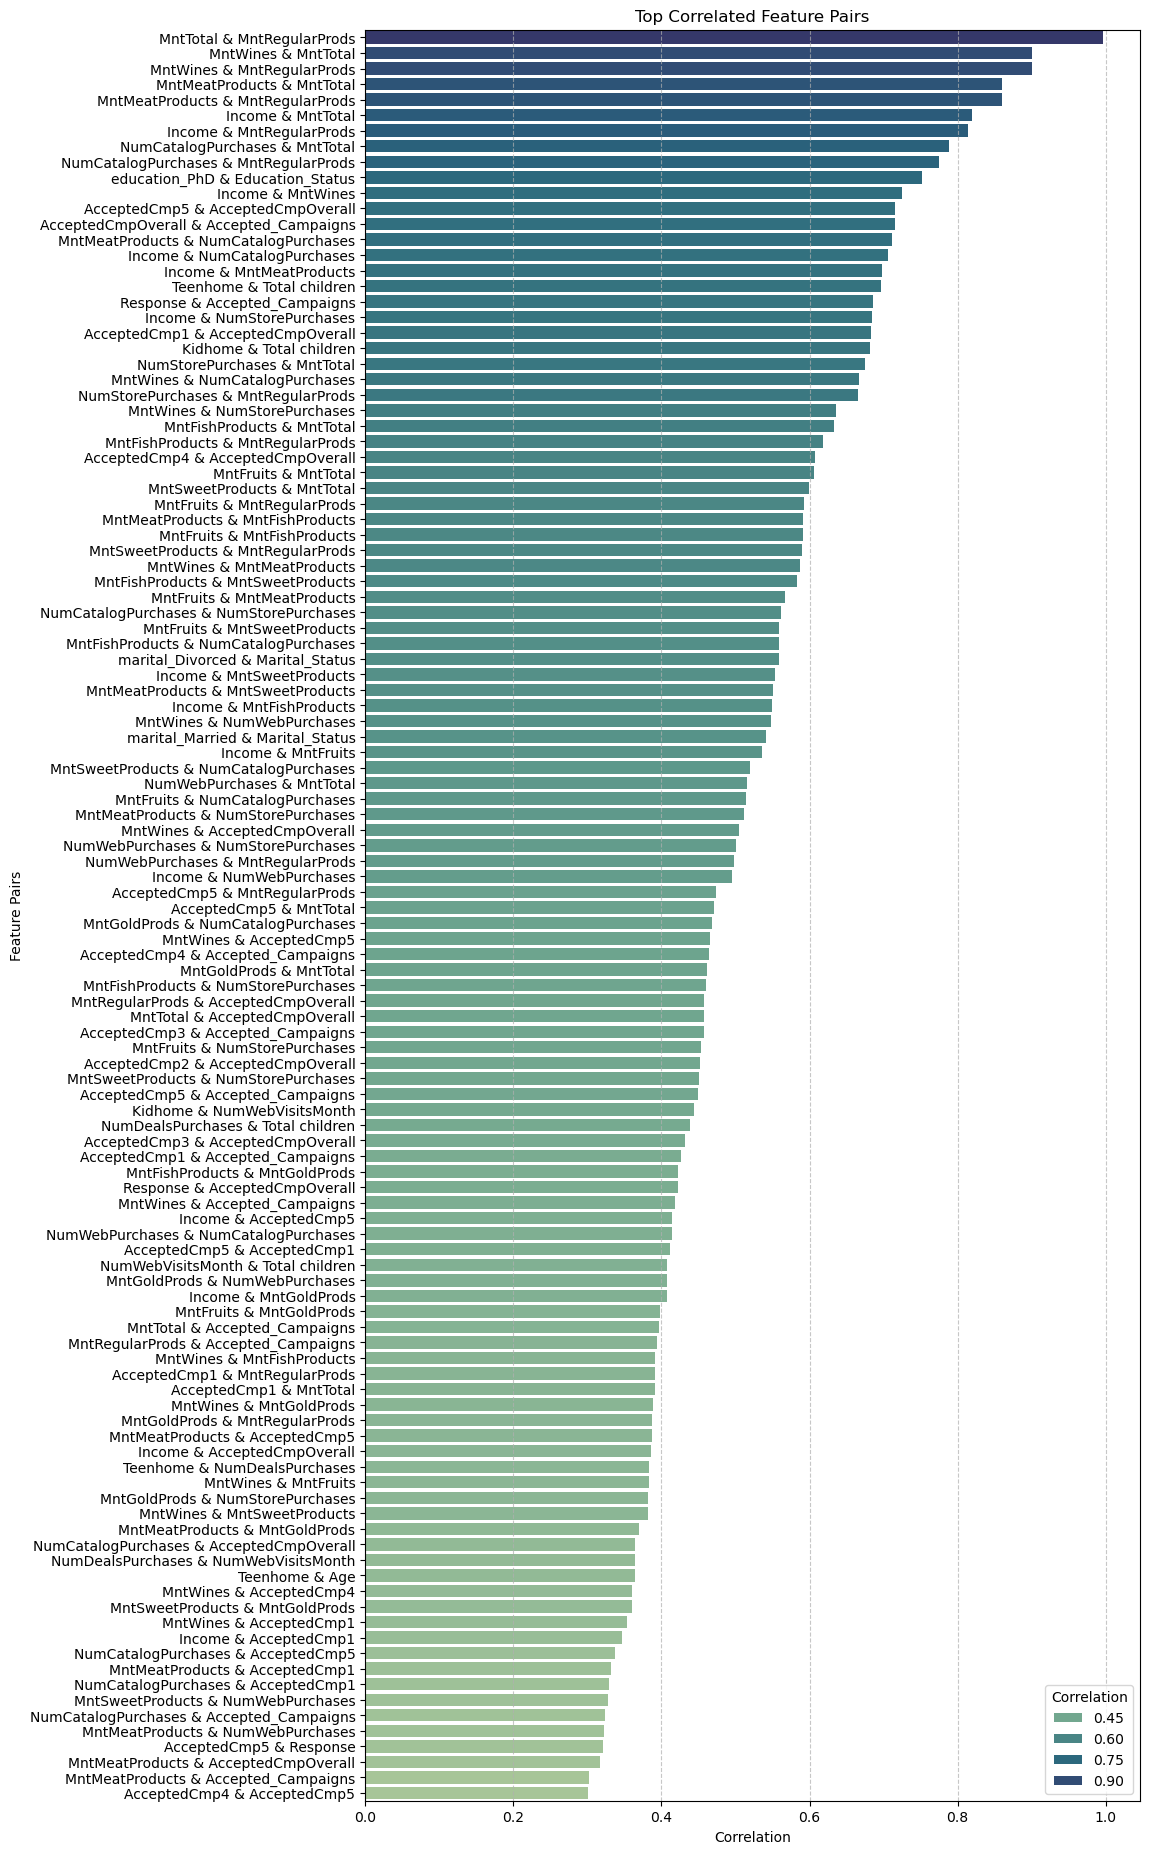

In [22]:
plt.figure(figsize=(10, 23))
sns.barplot(
    x=correlation_pairs['Correlation'], 
    y=correlation_pairs['Feature_1'] + " & " + correlation_pairs['Feature_2'], 
    palette="crest",
    hue=correlation_pairs['Correlation']
)
plt.xlabel("Correlation")
plt.ylabel("Feature Pairs")
plt.title("Top Correlated Feature Pairs")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

## Setting age range

In [23]:
# LIST OF SORTED UNIQUE VALUES OF AGE
print(*sorted(food['Age'].unique()), sep=" ")

24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 79 80


In [24]:
age_groups = [(23,30), (31,40), (41,50), (51,60), (61,70), (71,80)]

# function creates a string with an age group, like "61 - 70" for age 63
def assign_age_group(Age):
    for age_range in age_groups:
        if age_range[0] <= Age <= age_range[1]:
            return f"{age_range[0]} - {age_range[1]}"
    return("unknown")

# new column with those groups
food['Age_group'] = food['Age'].apply(assign_age_group)

In [25]:
food[['Age', 'Age_group']].head()

,Age,Age_group
0,63,61 - 70
1,66,61 - 70
2,55,51 - 60
3,36,31 - 40
4,39,31 - 40


### The plot shows that the percent of people who accept campaigns are greater for people from age groups 23-30 and 71-80, BUT the amount of people of those groups is very low 

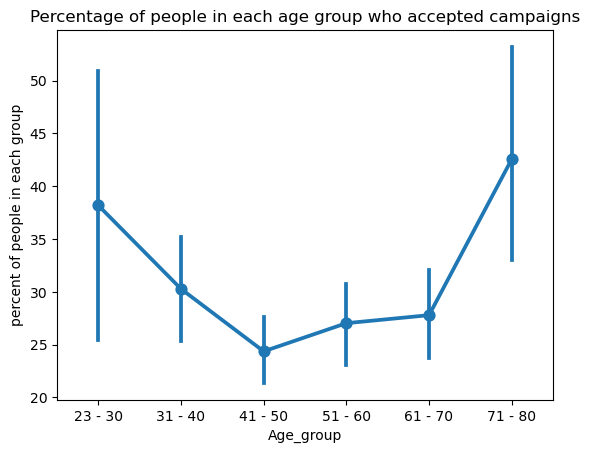

In [26]:
age_order = ['23 - 30', '31 - 40', '41 - 50', '51 - 60', '61 - 70', '71 - 80']

sns.pointplot(data = food,x = 'Age_group', y = food['Accepted_Campaigns']*100, order = age_order)
plt.title('Percentage of people in each age group who accepted campaigns')
plt.ylabel("percent of people in each group")
plt.show()

In [27]:
counts = food['Age_group'].value_counts()
counts

Age_group
41 - 50    669
51 - 60    455
61 - 70    421
31 - 40    327
71 - 80     94
23 - 30     55
Name: count, dtype: int64

#### The plot shows that the percent of people who accept campaigns are greater for people from age groups 23-30 and 71-80, BUT the amount of people of those groups is very low Otherwise, people from  31 to 70 don't often participate in campaigns, but their ammount is huge

In [28]:
percentage = counts / food.shape[0] * 100
percent_food_ages = percentage.reset_index()
percent_food_ages.columns = ['age_group', 'percentage']
percent_food_ages.sort_values('age_group', inplace=True)
percent_food_ages

,age_group,percentage
5,23 - 30,2.721425
3,31 - 40,16.180109
0,41 - 50,33.102425
1,51 - 60,22.513607
2,61 - 70,20.831272
4,71 - 80,4.651163


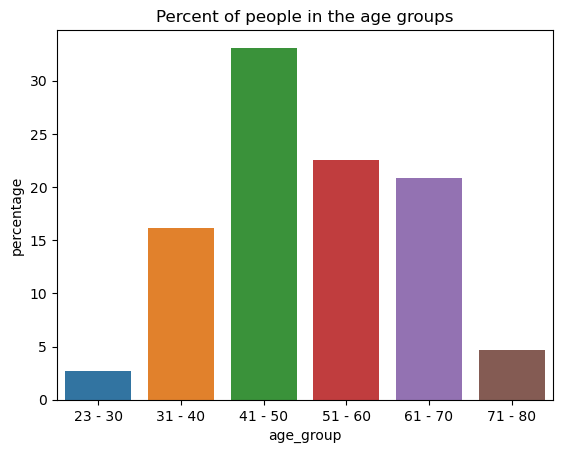

In [29]:
sns.barplot(data = percent_food_ages, x = 'age_group', y = 'percentage', hue = 'age_group')
plt.title('Percent of people in the age groups')
plt.show()

### Age segmentation - core audience for accepting campaigns right now is 31 -70 years

## Amount spent per age group

In [30]:
grouped_food = food.groupby('Age_group')['MntTotal'].sum().reset_index()
grouped_food

,Age_group,MntTotal
0,23 - 30,42968
1,31 - 40,155050
2,41 - 50,323387
3,51 - 60,266028
4,61 - 70,266829
5,71 - 80,85156


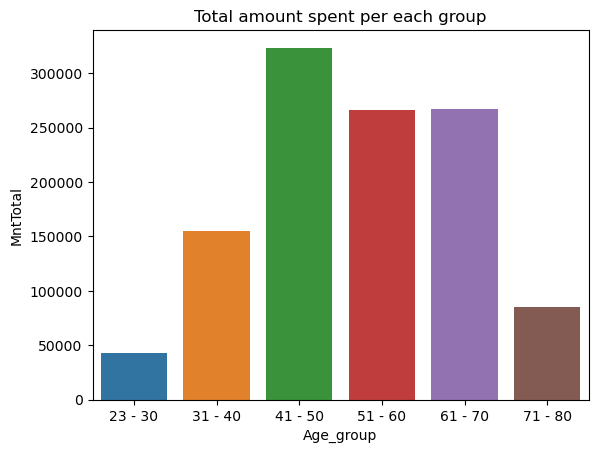

In [31]:
sns.barplot(data = grouped_food, x = 'Age_group', y = 'MntTotal', hue = 'Age_group')
plt.title('Total amount spent per each group')
plt.show()

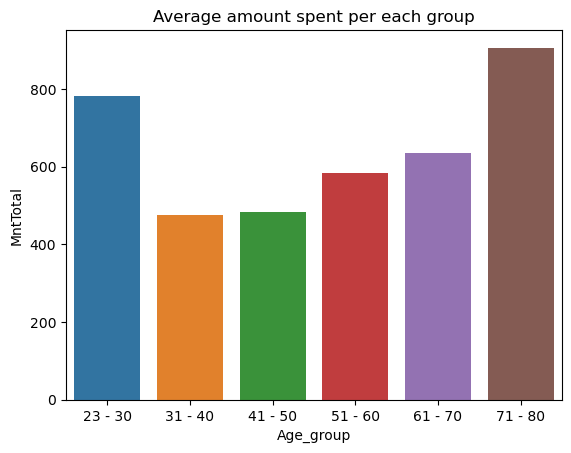

In [32]:
avg_grouped_food = food.groupby('Age_group')['MntTotal'].mean().reset_index()
avg_grouped_food
sns.barplot(data = avg_grouped_food, x = 'Age_group', y = 'MntTotal', hue = 'Age_group')
plt.title('Average amount spent per each group')
plt.show()

## Amount spent of those who accepted campaigns

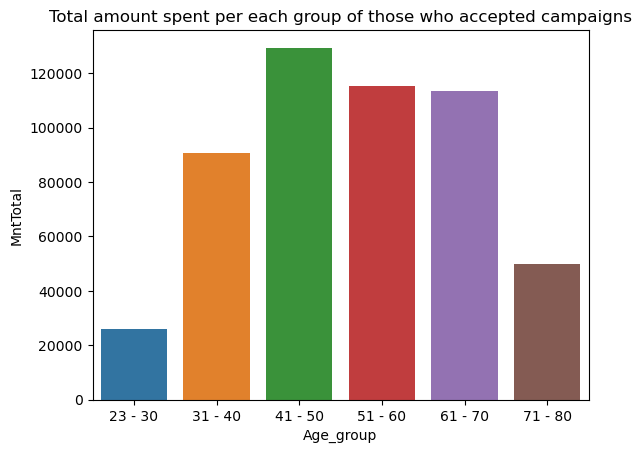

In [33]:
accept_camp = food[food['Accepted_Campaigns'] !=0]

accept_grouped_food = accept_camp.groupby('Age_group')['MntTotal'].sum().reset_index()

sns.barplot(data = accept_grouped_food, x = 'Age_group', y = 'MntTotal', hue = 'Age_group')
plt.title('Total amount spent per each group of those who accepted campaigns')
plt.show()

### Age segmentation - core audience for accepting campaigns right now is 31 -70 years
### 23-30, 71-80 who accepted are at higher range

## Types of purchasing: Web, Catalog and Store

In [34]:
sum_food = pd.DataFrame(food[['NumWebPurchases',	'NumCatalogPurchases',	'NumStorePurchases']].sum(), columns = ['Sums'])
sum_food =  sum_food.reset_index()
sum_food

,index,Sums
0,NumWebPurchases,8317
1,NumCatalogPurchases,5345
2,NumStorePurchases,11737


In [35]:
sum_food.rename(columns = {'index': 'Type_Of_Purchase'}, inplace=True)
sum_food

,Type_Of_Purchase,Sums
0,NumWebPurchases,8317
1,NumCatalogPurchases,5345
2,NumStorePurchases,11737


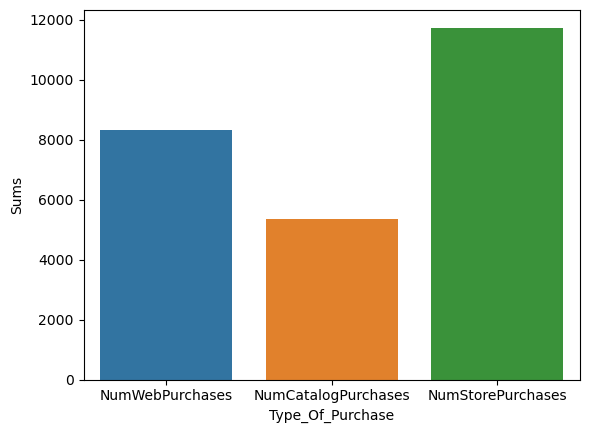

In [36]:
sns.barplot(data = sum_food, x = 'Type_Of_Purchase', y = 'Sums', hue = 'Type_Of_Purchase')
#plt.title('Types of purchasing by all customers')
plt.show()

## Types of purchasing: Web, Catalog and Store for accepted Campaigns

<Axes: xlabel='Type_Of_Purchase', ylabel='Sums'>

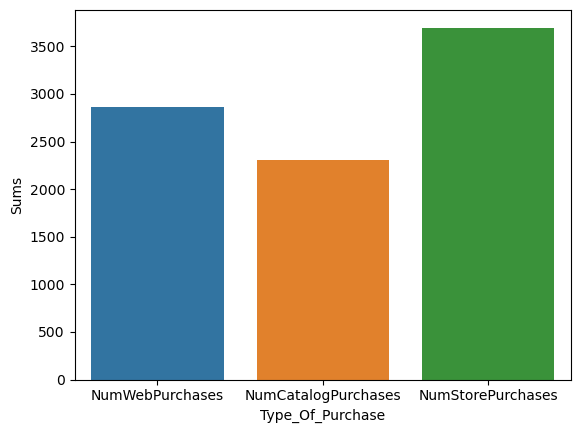

In [37]:
#For accepted only
accept_camp = food[food['Accepted_Campaigns'] !=0]
sum_food = pd.DataFrame(accept_camp[['NumWebPurchases',	'NumCatalogPurchases',	'NumStorePurchases']].sum(), columns = ['Sums'])
sum_food =  sum_food.reset_index()
sum_food.rename(columns = {'index': 'Type_Of_Purchase'}, inplace=True)
sns.barplot(data = sum_food, x = 'Type_Of_Purchase', y = 'Sums', hue = 'Type_Of_Purchase')


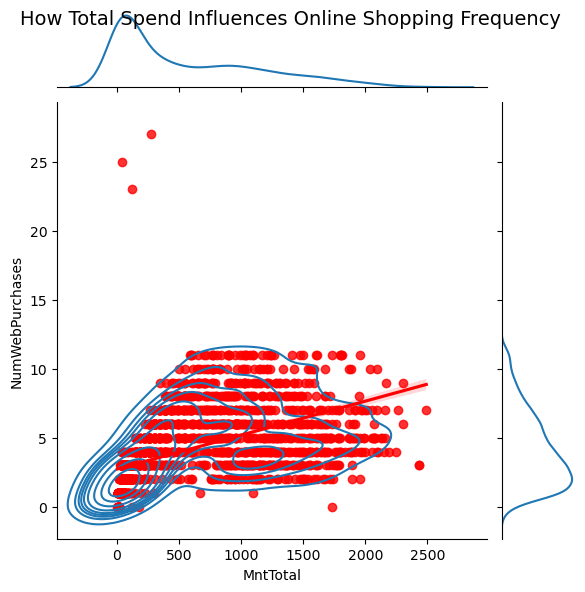

In [38]:
# adding plot with outliers and actual values
x = sns.jointplot(data = food, x = 'MntTotal', y = 'NumWebPurchases', kind = 'kde')
x.plot_joint(sns.regplot, color = 'red')
x.fig.suptitle('How Total Spend Influences Online Shopping Frequency', ha='center', fontsize=14)
plt.show()

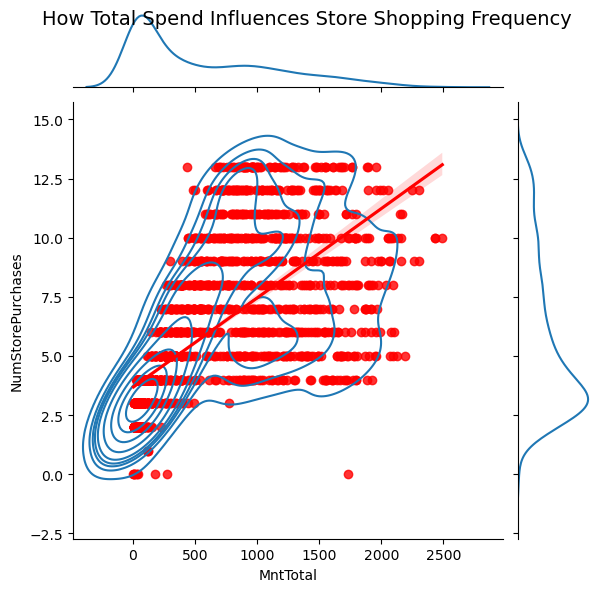

In [39]:
# adding plot with outliers and actual values
x = sns.jointplot(data = food, x = 'MntTotal', y = 'NumStorePurchases', kind = 'kde')
x.plot_joint(sns.regplot, color = 'red')
x.fig.suptitle('How Total Spend Influences Store Shopping Frequency', ha='center', fontsize=14)
plt.show()

#### 2 directions: Boost up the higher rpercentage catalog customers. Or focus In Store/WEB becase they have more traffic

## Regression: Total Children vs. spending

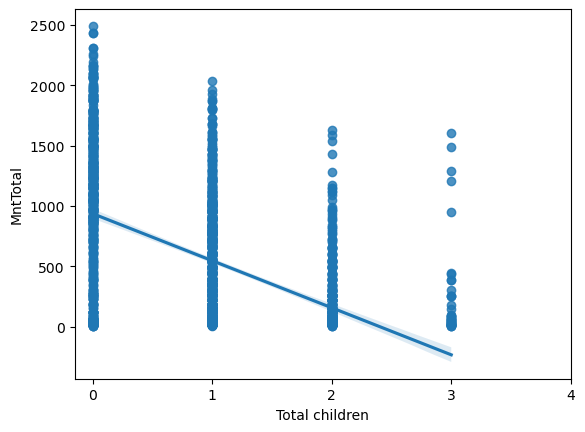

In [40]:
sns.regplot(x = 'Total children', y = 'MntTotal', data = food)
# Set x-axis ticks to show whole numbers (1, 2, 3, 4)
plt.xticks([0, 1, 2, 3, 4], labels=['0', '1', '2', '3', '4'])
plt.show()

#### People who haver more children are spending less money

## Total Children vs. Accepted campaigns

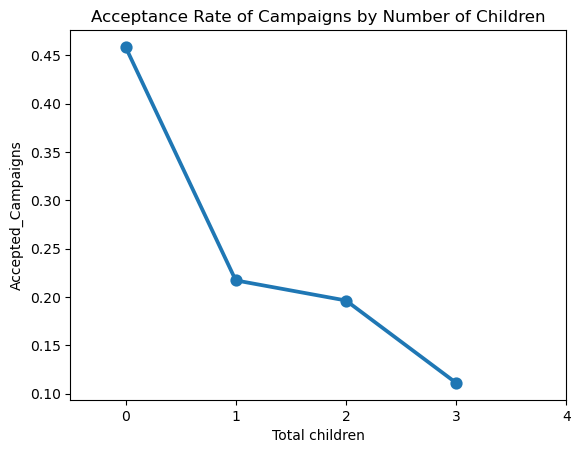

In [41]:
sns.pointplot(x='Total children', y='Accepted_Campaigns', data=food, errorbar=None)
plt.xticks([0, 1, 2, 3, 4], labels=['0', '1', '2', '3', '4'])
plt.title("Acceptance Rate of Campaigns by Number of Children")
plt.show()

### The less children the more accepted campains

## Customers by Marital Status

In [42]:
rel_food_count = food.groupby('Marital_Status_str')['MntTotal'].count().reset_index().sort_values(by = 'MntTotal', ascending = False)
rel_food_count

,Marital_Status_str,MntTotal
1,Married,785
3,Together,509
2,Single,443
0,Divorced,214
4,Widow,70


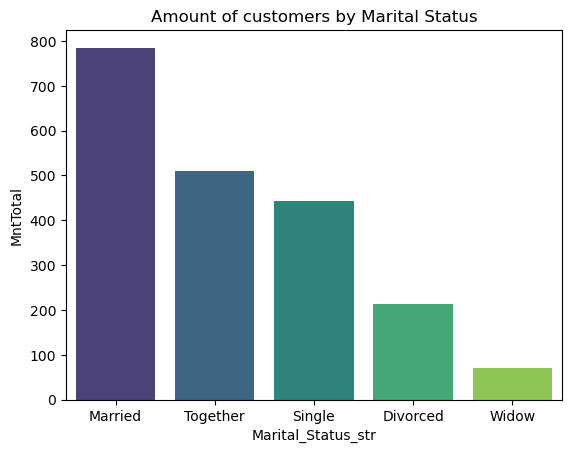

In [43]:
sns.barplot(x='Marital_Status_str', y = 'MntTotal', data = rel_food_count, hue = 'Marital_Status_str', palette= 'viridis')
plt.title('Amount of customers by Marital Status')
plt.show()

## Total spent by Marital Status

In [44]:
rel_food = food.groupby('Marital_Status_str')['MntTotal'].sum().reset_index().sort_values(by = 'MntTotal', ascending = False)
rel_food

,Marital_Status_str,MntTotal
1,Married,431445
3,Together,286887
2,Single,251580
0,Divorced,120959
4,Widow,48547


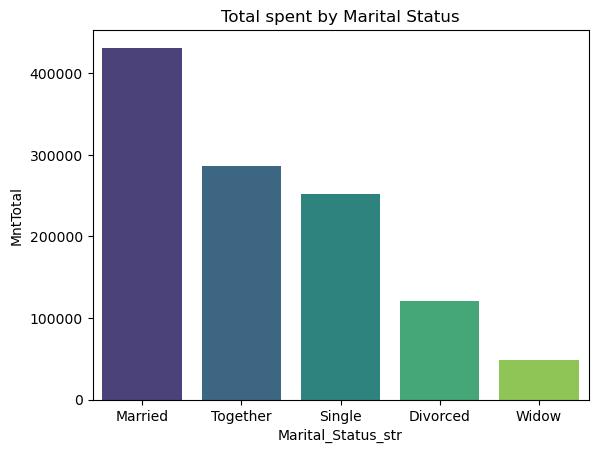

In [45]:
sns.barplot(x='Marital_Status_str', y = 'MntTotal', data = rel_food, hue = 'Marital_Status_str', palette= 'viridis')
plt.title('Total spent by Marital Status')
plt.show()

### Married, single, together spend much more money

## Types of goods by total ammount spent

In [46]:
food_types_all = food[['MntWines',	'MntFruits',	'MntMeatProducts',	'MntFishProducts',	'MntSweetProducts',	'MntGoldProds']]
food_types_all.head()

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,635,88,546,172,88,88
1,11,1,6,2,1,6
2,426,49,127,111,21,42
3,11,4,20,10,3,5
4,173,43,118,46,27,15


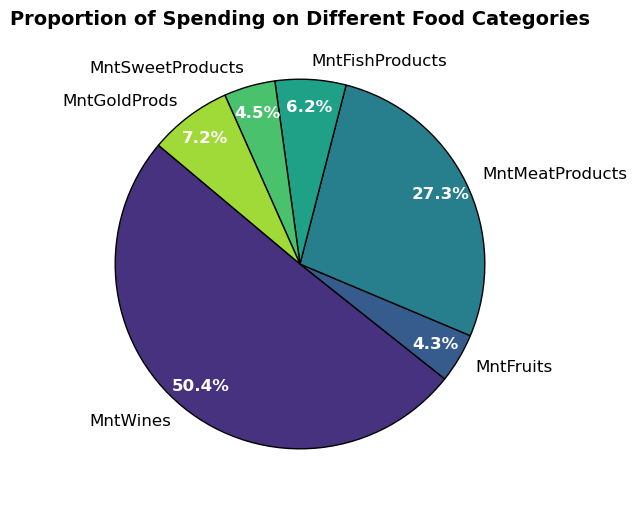

In [47]:
food_sums = food_types_all.sum()
colors = sns.color_palette("viridis", len(food_sums))

plt.figure(figsize=(8, 6))
wedges, texts, autotexts = plt.pie(
    food_sums, labels=food_sums.index, autopct='%1.1f%%', colors=colors, 
    startangle=140, pctdistance=0.85, wedgeprops={'edgecolor': 'black', 'linewidth': 1}
)
for text in texts:
    text.set_fontsize(12)
    text.set_color("black")
for autotext in autotexts:
    autotext.set_fontsize(12)
    autotext.set_color("white")
    autotext.set_weight("bold")
plt.title("Proportion of Spending on Different Food Categories", fontsize=14, fontweight="bold")
plt.show()

## Types of goods by age groups

In [48]:
food_types = food[['MntWines',	'MntFruits',	'MntMeatProducts',	'MntFishProducts',	'MntSweetProducts',	'MntGoldProds', 'Age_group']]
food_types

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Age_group
0,635,88,546,172,88,88,61 - 70
1,11,1,6,2,1,6,61 - 70
2,426,49,127,111,21,42,51 - 60
3,11,4,20,10,3,5,31 - 40
4,173,43,118,46,27,15,31 - 40
...,...,...,...,...,...,...,...
2198,5,1,6,3,4,3,31 - 40
2200,709,43,182,42,118,247,51 - 60
2202,908,48,217,32,12,24,31 - 40
2203,428,30,214,80,30,61,61 - 70


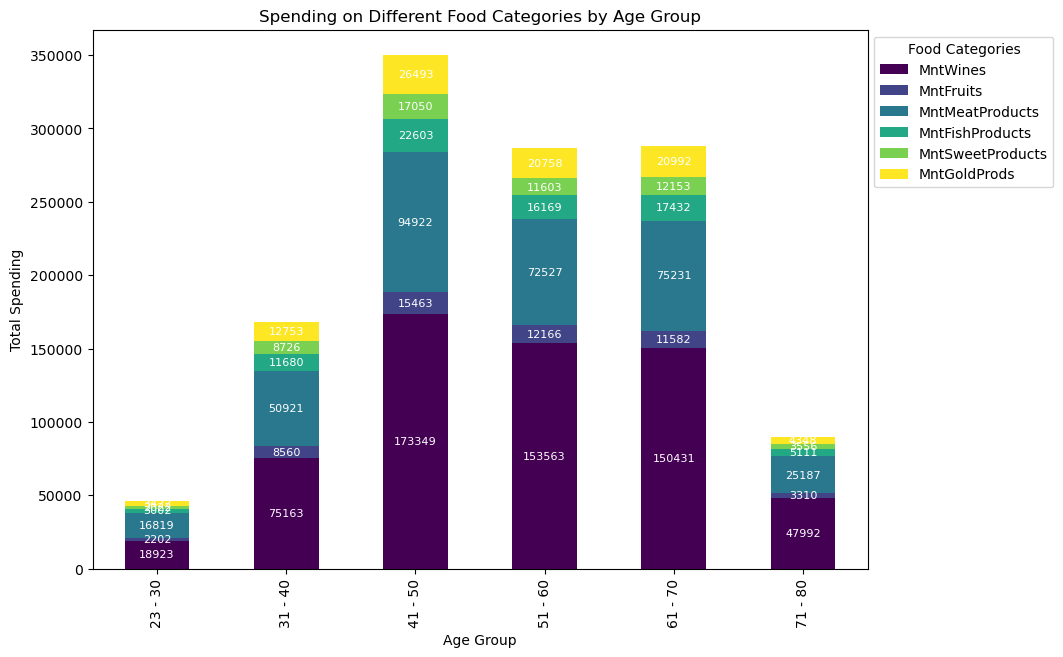

In [49]:
food_grouped = food_types.groupby("Age_group").sum()

ax = food_grouped.plot(kind="bar", stacked=True, figsize=(10,7), colormap="viridis")
plt.title("Spending on Different Food Categories by Age Group")
plt.ylabel("Total Spending")
plt.xlabel("Age Group")
plt.legend(title="Food Categories", bbox_to_anchor=(1,1))
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", label_type="center", fontsize=8, color="white")

plt.show()

## Types of goods by marital status

In [50]:
food_types_mar = food[['MntWines',	'MntFruits',	'MntMeatProducts',	'MntFishProducts',	'MntSweetProducts',	'MntGoldProds', 'Marital_Status_str']]
food_types_mar

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Marital_Status_str
0,635,88,546,172,88,88,Single
1,11,1,6,2,1,6,Single
2,426,49,127,111,21,42,Together
3,11,4,20,10,3,5,Together
4,173,43,118,46,27,15,Married
...,...,...,...,...,...,...,...
2198,5,1,6,3,4,3,Single
2200,709,43,182,42,118,247,Married
2202,908,48,217,32,12,24,Divorced
2203,428,30,214,80,30,61,Together


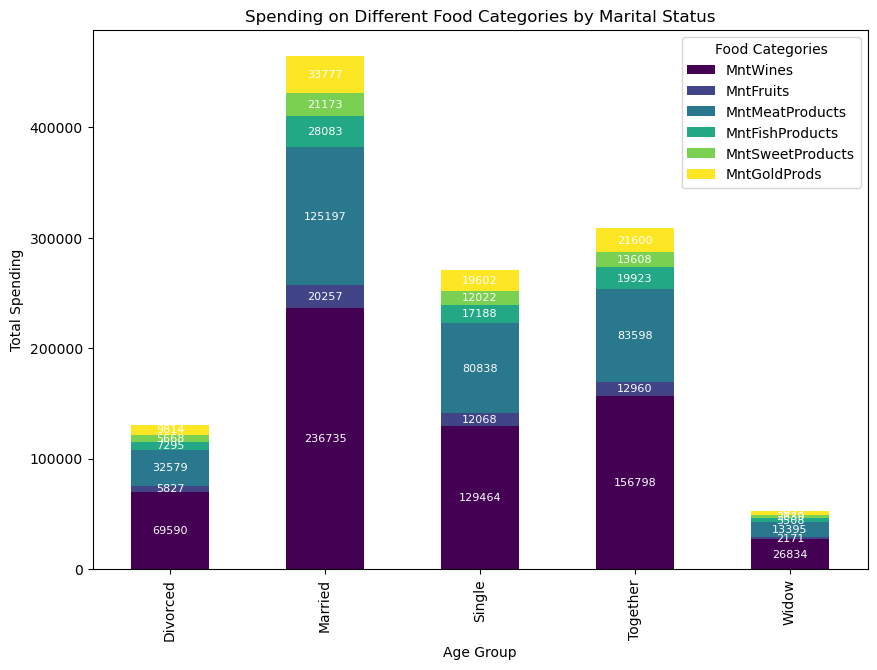

In [51]:
food_grouped_mar = food_types_mar.groupby("Marital_Status_str").sum()

ax = food_grouped_mar.plot(kind="bar", stacked=True, figsize=(10,7), colormap="viridis" )
plt.title("Spending on Different Food Categories by Marital Status")
plt.ylabel("Total Spending")
plt.xlabel("Age Group")
plt.legend(title="Food Categories", bbox_to_anchor=(1,1))
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", label_type="center", fontsize=8, color="white")

plt.show()

# Overall Findings

1. **Age 30-70** – Spend more money but are less likely to accept campaigns. However, they are a large group.
2. **Catalog** – More likely to accept campaigns, but in-person shoppers spend more.  
   - Suggested split: **40% catalog, 30% store, 30% web**.
3. **Focus on people with no kids (or fewer kids).**
4. **Education** – No significant impact. No need to target specific groups.
5. **Marital status** – Doesn't matter much. Married, single, or in a relationship – they all spend similarly.

## Best Strategies  

### High-Spending Users  
- **Middle-aged, high earners, no kids.** Target them on different platforms with the split above.

### New Users to Spend More  
- **Ages 21-30 and 70+** – More likely to accept campaigns. Focus on them.